In [1]:
!pip install keybert

In [2]:
!pip install wordcloud

In [3]:
!pip install tqdm

In [4]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import keybert

In [5]:
import os



before_path = os.path.abspath('csv/Popular_Comments_Before.csv')
after_path  = os.path.abspath('csv/Popular_Comments_After.csv')


# CSV-Dateien laden, wenn sie existieren
if os.path.exists(before_path) and os.path.exists(after_path):
    Comments_Before = pd.read_csv(before_path)
    Comments_After  = pd.read_csv(after_path)
    print("Dateien erfolgreich geladen!")
else:
    print("Eine oder beide Dateien wurden nicht gefunden. Pfade prüfen!")

Dateien erfolgreich geladen!


In [6]:

model = keybert.KeyBERT()

In [7]:
keywords_list = []
for row_i in tqdm(range(Comments_Before.shape[0])):
    row = Comments_Before.iloc[row_i]
    keywords = []
    title_abstract = row['text'] 
    keywords.append(model.extract_keywords(title_abstract,
                       keyphrase_ngram_range = (1,1)))
    keywords.append(model.extract_keywords(title_abstract,
                       keyphrase_ngram_range = (1,2)))
    keywords_list.append(keywords)

  0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
Comments_Before['keywords'] = keywords_list

In [9]:
Comments_Before

,Unnamed: 0.1,Unnamed: 0,videoId,author,publishedAt,likeCount,text,period,keywords
0,0,44,bQNsHivR9AU,@jochenkrebs9685,2022-10-20T19:19:36Z,7917,Schade dass Politiker nicht persönlich für das...,Before Founding,"[[(müssen, 0.5075), (anrichten, 0.4708), (haft..."
1,1,121,kyUaDbVjMr0,@seemax7956,2021-11-19T07:22:26Z,7385,Um Loriot zu zitieren „In Krisenzeiten suchen ...,Before Founding,"[[(krisenzeiten, 0.4251), (haltung, 0.4008), (..."
2,2,40,bQNsHivR9AU,@sternmeer5346,2022-10-20T19:04:43Z,5816,"Absolut jedes Wort, das Sie zur Beschreibung d...",Before Founding,"[[(beschreibung, 0.5429), (beschreiben, 0.4969..."
3,3,0,WCwx94TOGPQ,@andreasmann1111,2022-02-03T19:47:21Z,5571,Liebe Sahra schön dich gesund zu sehen. Im Geg...,Before Founding,"[[(gesund, 0.467), (sehen, 0.3641), (gegensatz..."
4,4,332,LbnRTQTJ7bQ,@fffrankk,2022-01-27T19:56:17Z,5275,"Wie üblich: Tausend Dank dafür, eine der wenig...",Before Founding,"[[(tausend, 0.5395), (dafür, 0.4174), (äußern,..."
...,...,...,...,...,...,...,...,...,...
495,495,160,aIylqpDNVIc,@letters_of_bach,2023-03-15T17:34:30Z,501,Bitte endlich Frieden!!!,Before Founding,"[[(endlich, 0.6916), (frieden, 0.5075), (bitte..."
496,496,227,ulaw8J_YFLw,@lucasstolz3717,2023-06-16T16:10:16Z,500,Freiheit für Julian assange. Wikileaks muss ar...,Before Founding,"[[(assange, 0.5503), (wikileaks, 0.5146), (fre..."
497,497,1022,UDGl7rCLrVI,@Flo-1887,2021-02-18T16:09:02Z,500,Wie recht Sie mal wieder haben Frau Wagenknecht!,Before Founding,"[[(wagenknecht, 0.6434), (recht, 0.496), (wied..."
498,498,1236,x4ms74GOJq8,@martinafueck,2023-09-07T16:50:40Z,499,"Die Ampel muss unbedingt abtreten, sonst fährt...",Before Founding,"[[(abtreten, 0.4313), (komplette, 0.3988), (fä..."


In [10]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [11]:
flattened_keywords = flatten(flatten(keywords_list))

In [12]:
flattened_keywords = [item[0] for item in flattened_keywords]

In [13]:
flattened_keywords


['müssen',
 'anrichten',
 'haften',
 'persönlich',
 'nicht',
 'haften müssen',
 'das haften',
 'müssen sie',
 'sie anrichten',
 'nicht persönlich',
 'krisenzeiten',
 'haltung',
 'intelligente',
 'beiträge',
 'schuldigen',
 'intelligente nach',
 'zitieren krisenzeiten',
 'beiträge und',
 'nach schuldigen',
 'idioten nach',
 'beschreibung',
 'beschreiben',
 'bezeichnen',
 'großes',
 'herzlichen',
 'zur beschreibung',
 'beschreibung der',
 'zu beschreiben',
 'beschreibung',
 'beschreiben',
 'gesund',
 'sehen',
 'gegensatz',
 'einen',
 'bleiben',
 'dich gesund',
 'gesund zu',
 'gesund',
 'uns erhalten',
 'gegensatz zu',
 'tausend',
 'dafür',
 'äußern',
 'politik',
 'und',
 'tausend dank',
 'üblich tausend',
 'tausend',
 'dafür eine',
 'deutschen politik',
 'abgeht',
 'einfach',
 'wagenknecht',
 'wahnsinn',
 'klaren',
 'nur wahnsinn',
 'einfach nur',
 'hier abgeht',
 'abgeht danke',
 'wahnsinn hier',
 'tolerieren',
 'totgeschwiegen',
 'einstellung',
 'land',
 'politische',
 'politische eins

In [14]:
keywords_df = pd.DataFrame()
keywords_df['words'] = Counter(flattened_keywords).keys()
keywords_df['numbers'] = Counter(flattened_keywords).values()
frequent_words = keywords_df.loc[keywords_df['numbers'] > 1].sort_values(by='numbers', ascending=False)
frequent_words

,words,numbers
48,wagenknecht,200
77,frau wagenknecht,93
41,und,90
123,ich,57
156,eine,57
...,...,...
856,spitze,2
848,grippe,2
839,rot,2
835,kompetenz,2


In [33]:
# Define custom list of words to exclude (case insensitive)
filtered_words = [
    "Wagenknecht", 
    "ich", 
    "und", 
    "nicht", 
    "das", 
    "ist", 
    "zu", 
    "der", 
    "eine", 
    'wagenknecht sie', 
    "sie"
    ]

# Filter out words by lowercasing
filtered_keywords = [w for w in flattened_keywords if w.lower() not in [fw.lower() for fw in filtered_words]]


In [34]:
filtered_keywords_df = pd.DataFrame()
filtered_keywords_df['words'] = Counter(filtered_keywords).keys()
filtered_keywords_df['numbers'] = Counter(filtered_keywords).values()
frequent_words_filtered = filtered_keywords_df.loc[filtered_keywords_df['numbers'] > 1].sort_values(by='numbers', ascending=False)
frequent_words_filtered.to_json('test.json')

In [35]:
import json 

json_str = frequent_words_filtered.to_json(orient="records", indent=2, force_ascii=False)

with open("Sahra_Wagenknecht_Words_B.json", "w", encoding="utf-8") as f:
    f.write(json_str)

In [36]:
wordcloud = WordCloud(background_color="white",
                      width=2500,
                      height=1000,
                      scale=2.0,
                      colormap= 'twilight',
                      min_font_size=6).fit_words(dict(Counter(filtered_keywords))).to_file('sahra_wagenknecht_before_word_cloud.png')

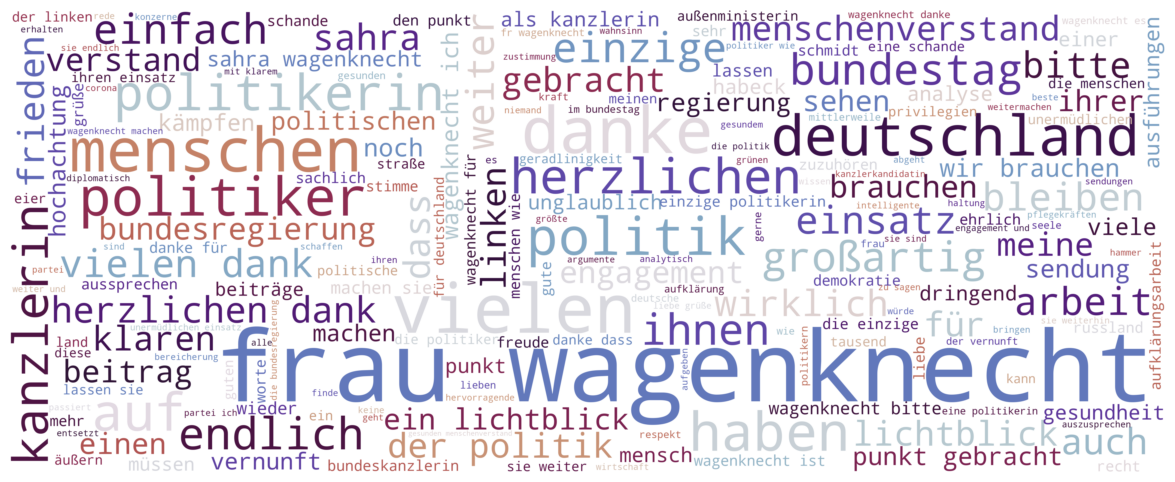

In [37]:
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()